In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
%matplotlib inline
import seaborn as sns; sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import math

In [2]:
df = pd.read_csv('../../../data/data-shared/labels-with-tags-chu.csv')

In [3]:
#select city == oradell
df = df[df['city'] == 'oradell']
df

,city,label_id,label_type,severity,zoom,heading,pitch,photographer_heading,photographer_pitch,user_id,global_attribute_id,tag_list,description,lat,lng
273588,oradell,9,CurbRamp,1.0,2,309.035706,-15.723214,108.536644,-0.496017,503d2482-420f-454e-8118-aac2d22592aa,745560.0,NaN,NaN,40.945518,-74.034111
273589,oradell,10,NoSidewalk,5.0,2,303.232147,-13.580358,108.536644,-0.496017,503d2482-420f-454e-8118-aac2d22592aa,745763.0,street has no sidewalks,NaN,40.945541,-74.034142
273590,oradell,11,CurbRamp,1.0,2,266.714294,-12.330358,108.536644,-0.496017,503d2482-420f-454e-8118-aac2d22592aa,745531.0,NaN,NaN,40.945435,-74.034157
273591,oradell,12,NoSidewalk,5.0,2,270.821442,-11.616072,108.536644,-0.496017,503d2482-420f-454e-8118-aac2d22592aa,745839.0,street has no sidewalks,NaN,40.945446,-74.034203
273592,oradell,13,Crosswalk,1.0,2,284.392853,-13.758928,108.536644,-0.496017,503d2482-420f-454e-8118-aac2d22592aa,747020.0,NaN,NaN,40.945473,-74.034142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290154,oradell,13110,Crosswalk,1.0,2,346.512848,-19.602142,279.567322,-3.312660,e86fdc72-c79d-4cdc-b5b2-8ef4859141d2,NaN,NaN,NaN,40.954166,-74.030319
290155,oradell,13111,CurbRamp,1.0,2,306.959290,-11.655714,279.567322,-3.312660,e86fdc72-c79d-4cdc-b5b2-8ef4859141d2,NaN,NaN,NaN,40.954166,-74.030441
290156,oradell,13112,CurbRamp,1.0,3,297.818665,-6.365536,281.548798,-3.298210,e86fdc72-c79d-4cdc-b5b2-8ef4859141d2,NaN,NaN,NaN,40.954197,-74.030685
290157,oradell,13113,Crosswalk,2.0,3,304.943665,-7.537411,281.548798,-3.298210,e86fdc72-c79d-4cdc-b5b2-8ef4859141d2,NaN,broken surface,NaN,40.954205,-74.030640


In [4]:
#get Nan counts of global attribute id
df['global_attribute_id'].isna().sum()

657

In [6]:
#turn df into geodataframe
geometry = [Point(xy) for xy in zip(df.lng, df.lat)]
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

In [7]:
#minx, miny, maxx, maxy
minx = -74.05131531  
miny = 40.94106674 
maxx = -74.00289154  
maxy = 40.97144699

oradell = gdf.cx[minx:maxx, miny:maxy]

In [8]:
oradell

,city,label_id,label_type,severity,zoom,heading,pitch,photographer_heading,photographer_pitch,user_id,global_attribute_id,tag_list,description,lat,lng,geometry
273588,oradell,9,CurbRamp,1.0,2,309.035706,-15.723214,108.536644,-0.496017,503d2482-420f-454e-8118-aac2d22592aa,745560.0,NaN,NaN,40.945518,-74.034111,POINT (-74.03411 40.94552)
273589,oradell,10,NoSidewalk,5.0,2,303.232147,-13.580358,108.536644,-0.496017,503d2482-420f-454e-8118-aac2d22592aa,745763.0,street has no sidewalks,NaN,40.945541,-74.034142,POINT (-74.03414 40.94554)
273590,oradell,11,CurbRamp,1.0,2,266.714294,-12.330358,108.536644,-0.496017,503d2482-420f-454e-8118-aac2d22592aa,745531.0,NaN,NaN,40.945435,-74.034157,POINT (-74.03416 40.94543)
273591,oradell,12,NoSidewalk,5.0,2,270.821442,-11.616072,108.536644,-0.496017,503d2482-420f-454e-8118-aac2d22592aa,745839.0,street has no sidewalks,NaN,40.945446,-74.034203,POINT (-74.03420 40.94545)
273592,oradell,13,Crosswalk,1.0,2,284.392853,-13.758928,108.536644,-0.496017,503d2482-420f-454e-8118-aac2d22592aa,747020.0,NaN,NaN,40.945473,-74.034142,POINT (-74.03414 40.94547)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290154,oradell,13110,Crosswalk,1.0,2,346.512848,-19.602142,279.567322,-3.312660,e86fdc72-c79d-4cdc-b5b2-8ef4859141d2,NaN,NaN,NaN,40.954166,-74.030319,POINT (-74.03032 40.95417)
290155,oradell,13111,CurbRamp,1.0,2,306.959290,-11.655714,279.567322,-3.312660,e86fdc72-c79d-4cdc-b5b2-8ef4859141d2,NaN,NaN,NaN,40.954166,-74.030441,POINT (-74.03044 40.95417)
290156,oradell,13112,CurbRamp,1.0,3,297.818665,-6.365536,281.548798,-3.298210,e86fdc72-c79d-4cdc-b5b2-8ef4859141d2,NaN,NaN,NaN,40.954197,-74.030685,POINT (-74.03069 40.95420)
290157,oradell,13113,Crosswalk,2.0,3,304.943665,-7.537411,281.548798,-3.298210,e86fdc72-c79d-4cdc-b5b2-8ef4859141d2,NaN,broken surface,NaN,40.954205,-74.030640,POINT (-74.03064 40.95420)


In [9]:
#oradell label id number of unique
oradell['label_id'].nunique()

12147

In [10]:
#select only label id taglist and description 
oradell = oradell[['label_id', 'tag_list', 'description']]

In [11]:
#select tag list that are not nan
oradell_tag = oradell.drop(columns=['description'])
oradell_tag = oradell_tag[oradell_tag['tag_list'].notna()]
# create a new column with the length of the tag list 
oradell_tag['tag_count'] = oradell_tag['tag_list'].str.split(',').str.len()
#drop tag_list column
oradell_tag = oradell_tag.drop(columns=['tag_list'])


In [12]:
#merge with oradell
oradell = oradell.merge(oradell_tag, on='label_id', how='left')

In [13]:
# #turn nan to 0 non nan to 1
oradell['tag_list'] = oradell['tag_list'].notna().astype('int')
oradell['description'] = oradell['description'].notna().astype('int')
#fill nan with 0
oradell = oradell.fillna(0)


In [14]:
#group by label id and max
oradell = oradell.groupby('label_id').max()
#reset index
oradell = oradell.reset_index()

<AxesSubplot: >

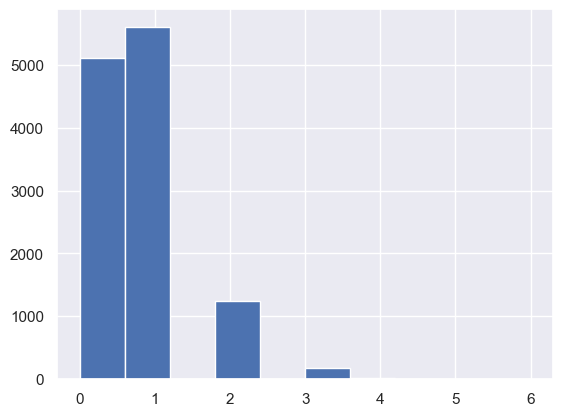

In [15]:
oradell['tag_count'].hist()

In [16]:
oradell

,label_id,tag_list,description,tag_count
0,9,0,0,0.0
1,10,1,0,1.0
2,11,0,0,0.0
3,12,1,0,1.0
4,13,0,0,0.0
...,...,...,...,...
12142,13110,0,0,0.0
12143,13111,0,0,0.0
12144,13112,0,0,0.0
12145,13113,1,0,1.0


In [17]:
#read in labels
labels = gpd.read_file('../../../data/oradell/processed-labels/labels_raw_oradell/labels_raw_oradell.shp')

In [18]:
#create a new df with only label id from labels
label_ids = labels[['label_id']]
#merge label ids with oradell
oradell = pd.merge(label_ids, oradell, on='label_id', how='left')
#fill nan with 0
oradell = oradell.fillna(0).sort_values(by='label_id').reset_index(drop=True)
oradell

,label_id,tag_list,description,tag_count
0,9,0.0,0.0,0.0
1,10,1.0,0.0,1.0
2,11,0.0,0.0,0.0
3,12,1.0,0.0,1.0
4,13,0.0,0.0,0.0
...,...,...,...,...
12129,13096,1.0,0.0,1.0
12130,13097,0.0,1.0,0.0
12131,13098,1.0,0.0,2.0
12132,13099,0.0,0.0,0.0


In [19]:
#rename columns tag_list to tags
oradell.rename(columns={'tag_list':'tag'}, inplace=True)
#change the order of columns to label_id, tags, tags_count, description
oradell= oradell[['label_id', 'tag', 'tag_count', 'description']]

In [20]:
oradell.to_csv('../../../data/oradell/features/optional_input.csv', index=False)